# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data_path = "../data/raptxtBx/"

## Choisir une décennie

In [5]:
DECADE = '1958'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [14]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:]}" in f]

In [15]:
# Exemple de fichiers
files[:40]
     

['Bxl_1958_Tome_RptAn_Part_1.txt',
 'Bxl_1958_Tome_RptAn_Part_10.txt',
 'Bxl_1958_Tome_RptAn_Part_2.txt',
 'Bxl_1958_Tome_RptAn_Part_3.txt',
 'Bxl_1958_Tome_RptAn_Part_4.txt',
 'Bxl_1958_Tome_RptAn_Part_5.txt',
 'Bxl_1958_Tome_RptAn_Part_6.txt',
 'Bxl_1958_Tome_RptAn_Part_7.txt',
 'Bxl_1958_Tome_RptAn_Part_8.txt',
 'Bxl_1958_Tome_RptAn_Part_9.txt']

In [16]:
texts = [open(data_path + f).read() for f in files]

In [17]:
# Exemple de textes
texts[0][:400]

"VILLE\n\nDE\n\nBRUXELLES\n\nRAPPORT\n\nANNUEL\n\nPRESENTE\nA U CONSEIL C O M M U N A L E N SEANCE D U 6 O C T O B R E 1958\nPAR L E C O L L E G E DES BOURGMESTRE E T ECHEVINS\nen exécution de l'article 70 de la loi du 30 mars 1836\n\nIMPRIMERIE H. & M. SCHAUMANS, S. A.\n41, parvis Saint-Gilles\nBRUXELLES\n\n1958\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\nL e Conseil s'est réuni 60 fois"

## Vectoriser les documents à l'aide de TF-IDF

In [18]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [19]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [20]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 4.43 s, sys: 0 ns, total: 4.43 s
Wall time: 4.43 s


In [21]:
# Détail de la matrice
tfidf_vectors

<10x31148 sparse matrix of type '<class 'numpy.float64'>'
	with 38846 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [22]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

8°                                                          0.792513
don                                                         0.174769
[                                                           0.164522
16°                                                         0.147444
4°                                                          0.147444
                                                              ...   
d'enseigner.++                                              0.000000
d'enseignement+secondaire                                   0.000000
d'enseignement+professionnel++427++en+apprentissage+chez    0.000000
d'enseignement+professionnel                                0.000000
™                                                           0.000000
Length: 31148, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [23]:
cosine([1, 2, 3], [1, 2, 3])

0

In [24]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [25]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [26]:
tfidf_array = tfidf_vectors.toarray()

In [27]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
cosine(tfidf_array[0], tfidf_array[1])

1.0

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [30]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [31]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [32]:
clusters = km_model.fit_predict(tfidf_vectors)

In [33]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [34]:
pprint(dict(clustering))

{0: ['Bxl_1958_Tome_RptAn_Part_8.txt'],
 1: ['Bxl_1958_Tome_RptAn_Part_4.txt',
     'Bxl_1958_Tome_RptAn_Part_5.txt',
     'Bxl_1958_Tome_RptAn_Part_6.txt',
     'Bxl_1958_Tome_RptAn_Part_7.txt'],
 2: ['Bxl_1958_Tome_RptAn_Part_2.txt',
     'Bxl_1958_Tome_RptAn_Part_3.txt',
     'Bxl_1958_Tome_RptAn_Part_9.txt'],
 3: ['Bxl_1958_Tome_RptAn_Part_10.txt'],
 4: ['Bxl_1958_Tome_RptAn_Part_1.txt']}


## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [35]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [36]:
reduced_vectors[:10]

array([[-0.31983448,  0.2682092 ],
       [-0.36095952,  0.73817716],
       [-0.33447926, -0.37908457],
       [-0.31718773, -0.43135216],
       [ 0.45464057, -0.01302861],
       [ 0.3978685 ,  0.00932956],
       [ 0.48610967,  0.00134328],
       [ 0.35590657,  0.03846202],
       [-0.09470864,  0.08368026],
       [-0.26735569, -0.31573615]])

### Générer le plot

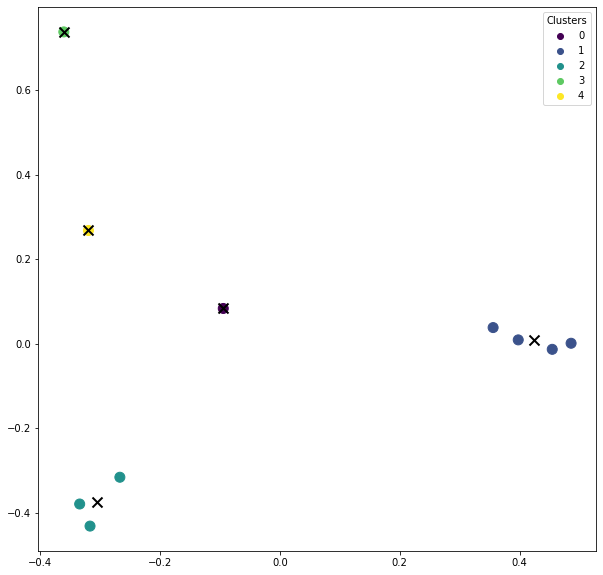

In [37]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")